# MetroPT-3

## Machine Learning And AI

### Import Libraries

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


import datetime
import pickle
import tensorflow as tf

pd.options.display.float_format = '{:,.2f}'.format


### Collect Dataset

In [111]:
df = pd.read_csv("MetroPT3(AirCompressor).csv")

### Knowing Dataset

In [112]:
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.01,9.36,9.34,-0.02,9.36,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
1,10,2020-02-01 00:00:10,-0.01,9.35,9.33,-0.02,9.35,53.68,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
2,20,2020-02-01 00:00:19,-0.01,9.34,9.32,-0.02,9.34,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
3,30,2020-02-01 00:00:29,-0.01,9.33,9.31,-0.02,9.33,53.42,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
4,40,2020-02-01 00:00:39,-0.01,9.32,9.30,-0.02,9.32,53.48,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00


In [113]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,"1,516,948.00","1,516,948.00","1,516,948.00","1,516,948.00","1,516,948.00","1,516,948.00","1,516,948.00","1,516,948.00","1,516,948.00","1,516,948.00","1,516,948.00","1,516,948.00","1,516,948.00","1,516,948.00","1,516,948.00","1,516,948.00"
mean,"7,584,735.00",1.37,8.98,7.57,0.06,8.99,62.64,2.05,0.84,0.16,0.92,0.83,0.00,0.99,0.90,0.94
std,"4,379,053.12",3.25,0.64,3.33,0.38,0.64,6.52,2.30,0.37,0.37,0.27,0.37,0.06,0.09,0.29,0.24
min,0.00,-0.03,0.73,-0.04,-0.03,0.71,15.40,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"3,792,367.50",-0.01,8.49,8.25,-0.02,8.49,57.78,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
50%,"7,584,735.00",-0.01,8.96,8.78,-0.02,8.96,62.70,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
75%,"11,377,102.50",-0.01,9.49,9.37,-0.02,9.49,67.25,3.81,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
max,"15,169,470.00",10.68,10.30,10.29,9.84,10.30,89.05,9.29,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

In [115]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [116]:
df.shape

(1516948, 17)

In [117]:
missing_values = df.isnull().sum()
print(missing_values,'\n\n\n', 'Dataset is good to go since there are no missing values')

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64 


 Dataset is good to go since there are no missing values


### Fix unlabeled data

In [118]:
# Change the column name of the first column
df = df.rename(columns={df.columns[0]: 'data_number'})
df['data_number'] = df['data_number'].astype(int)

### Virtualize Content

#### Distribution of Variables

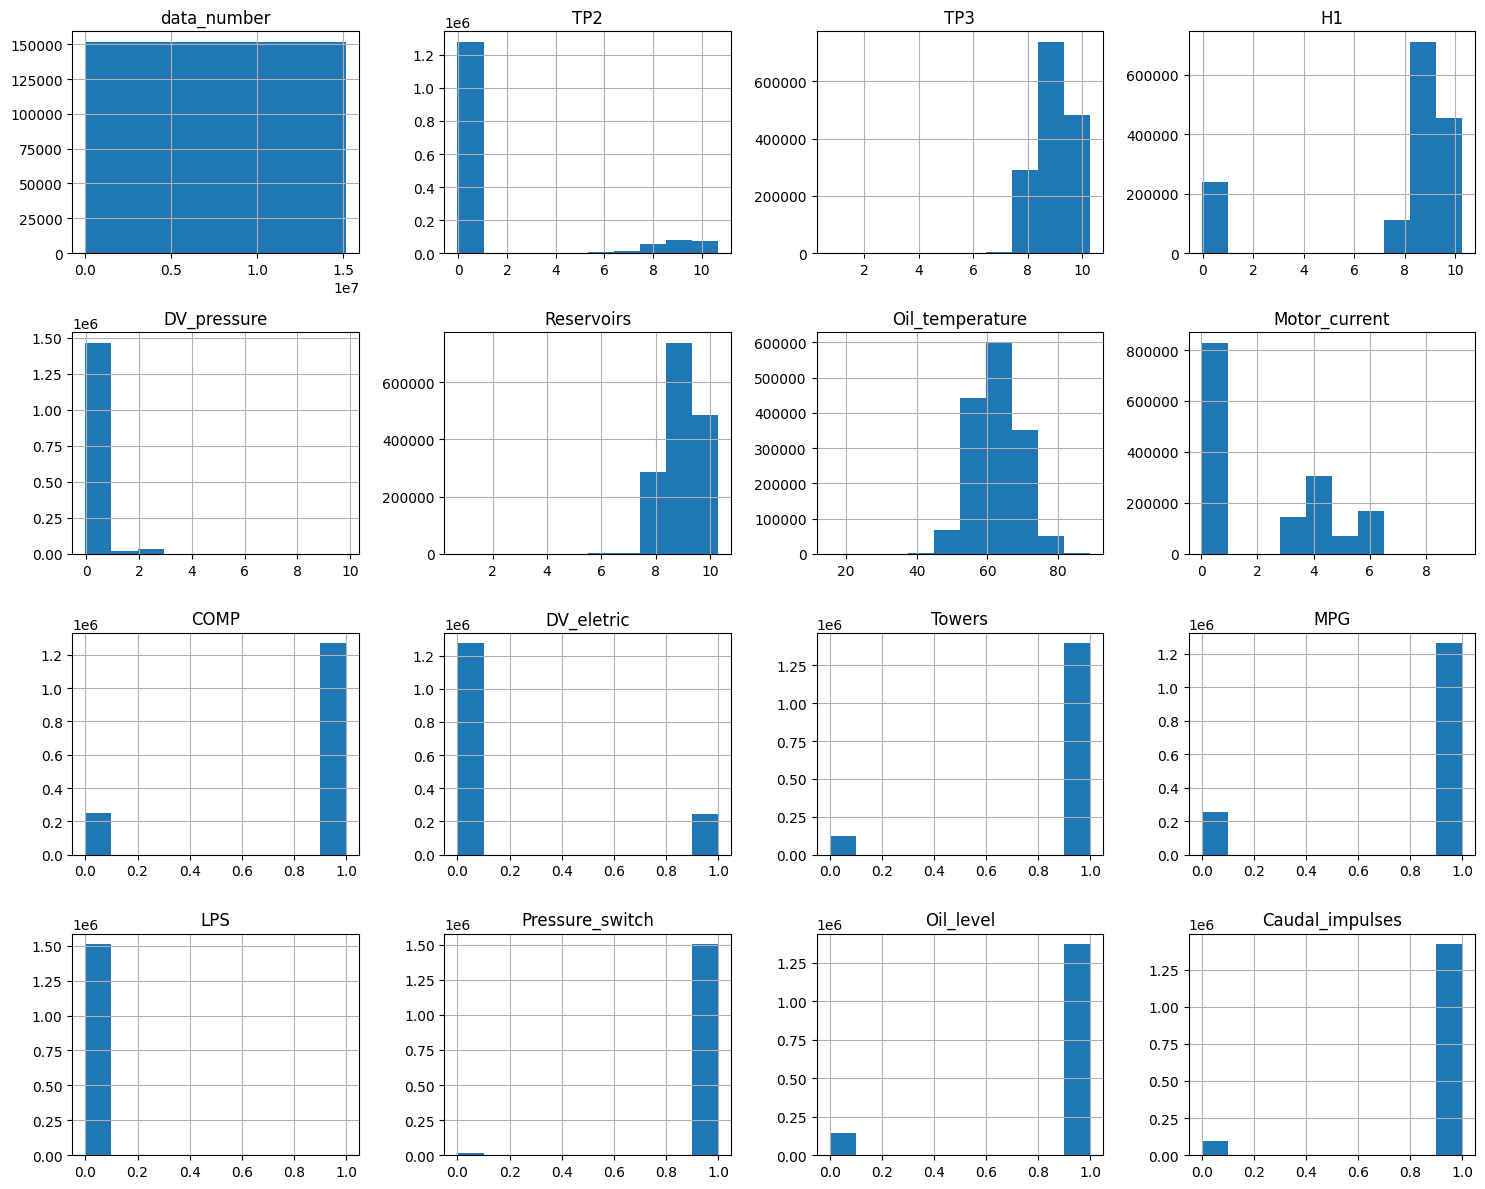

In [119]:
df.hist(figsize=(15, 12))  # Create histograms for all variables
plt.tight_layout()
plt.show()

#### Patterns between variables

C:\Users\Deleo Anangfac\AppData\Local\Temp\ipykernel_30232\2926154280.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


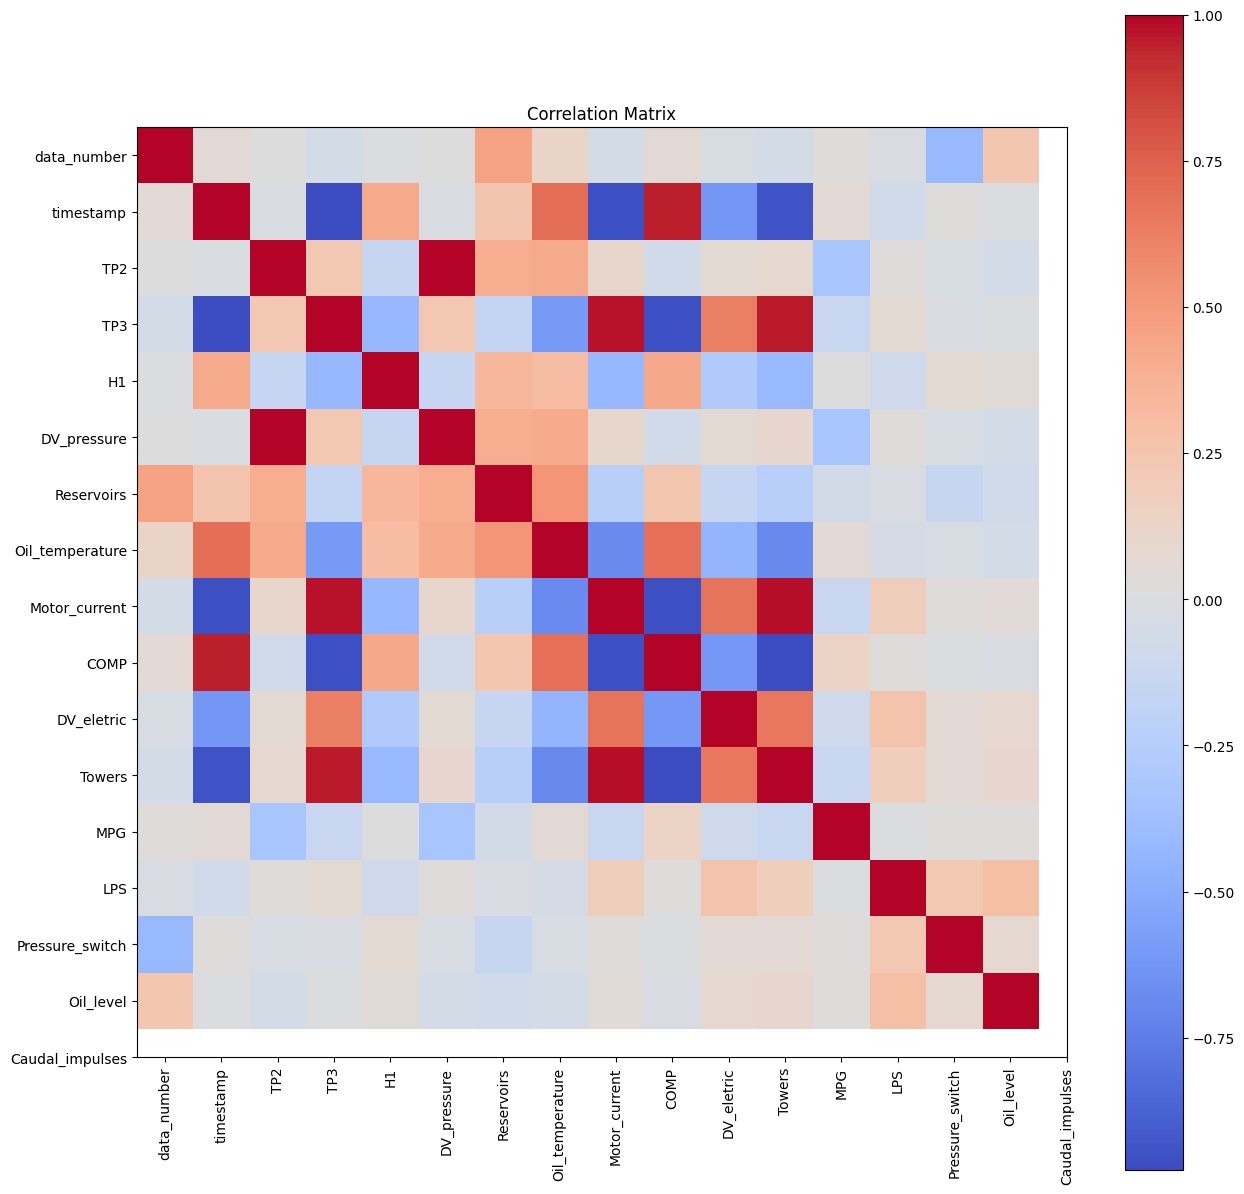

In [120]:
columns = df.columns
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(columns)), columns, rotation=90)
plt.yticks(np.arange(len(columns)), columns)
plt.title('Correlation Matrix')
plt.show()

### Prepare Data For Predictions

#### Time Stamp

In [121]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')  # Specify the timestamp format

In [122]:
# Checking if the datatype of timestamp has change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   data_number      1516948 non-null  int32         
 1   timestamp        1516948 non-null  datetime64[ns]
 2   TP2              1516948 non-null  float64       
 3   TP3              1516948 non-null  float64       
 4   H1               1516948 non-null  float64       
 5   DV_pressure      1516948 non-null  float64       
 6   Reservoirs       1516948 non-null  float64       
 7   Oil_temperature  1516948 non-null  float64       
 8   Motor_current    1516948 non-null  float64       
 9   COMP             1516948 non-null  float64       
 10  DV_eletric       1516948 non-null  float64       
 11  Towers           1516948 non-null  float64       
 12  MPG              1516948 non-null  float64       
 13  LPS              1516948 non-null  float64       
 14  Pr

#### Provide Maintenance Column

In [123]:
# Add a column and make it all 0
df['maintenance']=0

# Define the maintenance intervals along with instance labels
maintenance_intervals = [
    ('2020-04-18 00:00:00', '2020-04-18 23:59:00'),
    ('2020-05-29 23:30:00', '2020-05-30 06:00:00'),
    ('2020-06-05 10:00:00', '2020-06-07 14:30:00'),
    ('2020-07-15 14:30:00', '2020-07-15 19:00:00'),
]

# Change value of the add column for does who fall under the range of maintenance
for interval in maintenance_intervals:
    start_time, end_time = interval
    df.loc[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time), 'maintenance']=1

df.head()

,data_number,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,maintenance
0,0,2020-02-01 00:00:00,-0.01,9.36,9.34,-0.02,9.36,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0
1,10,2020-02-01 00:00:10,-0.01,9.35,9.33,-0.02,9.35,53.68,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0
2,20,2020-02-01 00:00:19,-0.01,9.34,9.32,-0.02,9.34,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0
3,30,2020-02-01 00:00:29,-0.01,9.33,9.31,-0.02,9.33,53.42,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0
4,40,2020-02-01 00:00:39,-0.01,9.32,9.30,-0.02,9.32,53.48,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0


### Random Forest Model

In [124]:
# Separate the features (sensor values) and the target variable (maintenance needed or not)
X = df.drop(['maintenance','data_number','timestamp'], axis=1)
y = df[['maintenance']]

In [125]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=10)

In [126]:
# Create a Random Forest classifier with default parameters
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, random_state=10)

In [127]:
# Train the model
rf_model.fit(X_train, y_train)

C:\Users\Deleo Anangfac\AppData\Local\Temp\ipykernel_30232\2312491017.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=10)

#### Save Random Forest(RF) Model

In [128]:
rf_path = './model/rf_model.pkl'
# Save the model to a file
with open(rf_path, 'wb') as f:
    pickle.dump(rf_model, f)

In [129]:
# Load the saved model from the file
with open(rf_path, 'rb') as f:
    rf_model = pickle.load(f)

In [130]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

#### Random Forest Model Evaluation

In [131]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"RF Accuracy: {accuracy*100:.4}%")
print(f"RF Precision: {precision*100:.4}%")
print(f"RF Recall: {recall*100:.4}%")
print(f"RF F1-score: : {f1*100:.4}%")

RF Accuracy: 99.92%
RF Precision: 97.78%
RF Recall: 98.38%
RF F1-score: : 98.08%


#### Maintenance Prediction of Random Forest(RF) Model

In [132]:
# This function is to provide one date in a month and avoid two days in a row to show that maintenance is needed
def final_date(dates_list):
    earliest_dates = {}

    for dt in dates_list:
        key = (dt.year, dt.month)
        
        if key not in earliest_dates or dt < earliest_dates[key]:
            earliest_dates[key] = dt

    result = [date.strftime('%d %B %Y') for date in earliest_dates.values()]

    return result

In [133]:
def maintenance(y_test, y_pred, df):
    # Save the content of y_test to y_main then update the values in y_main with the predicted values from y_pred
    y_main = y_test
    y_main['maintenance'] = y_pred

    # Filter the test DataFrame to get the timestamps where maintenance is needed (y_pred = 1)
    indices = y_main[y_main['maintenance'] == 1].index

    # Retrieve the timestamps from the original DataFrame using the filtered indices
    maintenance_days = df.loc[indices, 'timestamp'].sort_index()
    days = maintenance_days.dt.date

    # Group by the date and count the occurrences
    date_counts = days.value_counts()

    # Get the dates that appear more than 1000 times
    main_days = date_counts[date_counts > 1000].sort_index()

    # Display the filtered dates
    main_days_rul = pd.to_datetime(main_days.index, format='%Y-%m-%d')
    main = final_date(main_days_rul)
    
    return main


In [134]:
main_days_rul = maintenance(y_test, y_pred, df)
ans=", ".join(main_days_rul)
print(f'For the Random Forest Model, Maintenance is needed on this various dates {ans}.')

For the Random Forest Model, Maintenance is needed on this various dates 18 April 2020, 30 May 2020, 05 June 2020, 15 July 2020.


#### Remaining Useful Life(RUL) of Random Forest(RF) Model

In [135]:
# This function is to check the differences between dates in a list of dates
def rul(dates_info):
    days = []
    # [date.strftime('%Y-%m-%d') for date in dates_info]
    for i in range(len(dates_info)):
        if i == len(dates_info) - 1:
            break
        
        start_date = datetime.datetime.strptime(dates_info[i], "%d %B %Y")
        end_date = datetime.datetime.strptime(dates_info[i + 1], "%d %B %Y")
        number = (end_date - start_date).days
        
        days.append(number)

    return days

In [136]:
time_between_dates = rul(main_days_rul)
RUL = round(np.mean(time_between_dates))
print(f"For the Random Forest Model, Estimated Remaining Useful Life after every maintenance is {RUL} days.")

For the Random Forest Model, Estimated Remaining Useful Life after every maintenance is 29 days.


### RNN : Long-Short Term Memory(LSTM) Model

In [137]:
X = df.drop(['maintenance','data_number','timestamp'], axis=1)
y = df[['maintenance']]

In [138]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=10)

In [139]:
# Reshape the input features for LSTM (if needed)
# LSTM expects input of shape (samples, time steps, features)
# In this example, we assume each sequence of 1000 or more consecutive rows represents a time step
time_step = 1
num_features = X.shape[1]

# Reshape the input features for LSTM
X_train_np = np.reshape(X_train.values, (-1, time_step, num_features))
X_test_np = np.reshape(X_test.values, (-1, time_step, num_features))


In [140]:
# Reshape the target variable for consistency
y_train_np = np.reshape(y_train.values, (-1, time_step, 1))
y_test_np = np.reshape(y_test.values, (-1, time_step, 1))

In [141]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(time_step, num_features), return_sequences=True))
lstm_model.add(Dense(units=1, activation='sigmoid')) # Adjust the number of units based on your requirements


In [142]:
# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [143]:
# Train the model
lstm_model.fit(X_train_np, y_train_np, epochs=20, batch_size=32)
keeper=lstm_model

Epoch 1/20


9481/9481 [==============================] - 31s 3ms/step - loss: 0.0271 - accuracy: 0.9868
Epoch 2/20
9481/9481 [==============================] - 28s 3ms/step - loss: 0.0233 - accuracy: 0.9883
Epoch 3/20
9481/9481 [==============================] - 32s 3ms/step - loss: 0.0216 - accuracy: 0.9901
Epoch 4/20
9481/9481 [==============================] - 30s 3ms/step - loss: 0.0198 - accuracy: 0.9916
Epoch 5/20
9481/9481 [==============================] - 28s 3ms/step - loss: 0.0179 - accuracy: 0.9928
Epoch 6/20
9481/9481 [==============================] - 29s 3ms/step - loss: 0.0167 - accuracy: 0.9932
Epoch 7/20
9481/9481 [==============================] - 28s 3ms/step - loss: 0.0159 - accuracy: 0.9934
Epoch 8/20
9481/9481 [==============================] - 29s 3ms/step - loss: 0.0154 - accuracy: 0.9935
Epoch 9/20
9481/9481 [==============================] - 29s 3ms/step - loss: 0.0150 - accuracy: 0.9936
Epoch 10/20
9481/9481 [==============================] - 29s 3ms/step - loss: 0.0147

#### Save Long-Short Term Memory(LSTM) Model

In [144]:
lstm_path = './model/lstm_model'
# Save the model to a file
lstm_model.save(lstm_path)


INFO:tensorflow:Assets written to: ./model/lstm_model\assets


INFO:tensorflow:Assets written to: ./model/lstm_model\assets


In [145]:
# Load the saved model from the file
lstm_model = tf.keras.models.load_model(lstm_path)

In [146]:
# Predict on the test set
y_pred_np = lstm_model.predict(X_test_np)

37924/37924 [==============================] - 69s 2ms/step


#### Long-Short Term Memory Evaluation

In [147]:
# Reshape the predictions into a 1-dimensional list
predictions = np.array(y_pred_np)
y_pred = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels
y_pred = np.squeeze(y_pred).tolist()
print(y_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [148]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"LSTM Model Accuracy: {accuracy*100:.4}%")
print(f"LSTM Model Precision: {precision*100:.4}%")
print(f"LSTM Model Recall: {recall*100:.4}%")
print(f"LSTM Model F1-score: {f1*100:.4}%")

# Other Evaluation
loss, accuracy = lstm_model.evaluate(X_test_np, y_test_np)
print(f"\n\nLSTM Model Accuracy: {accuracy*100:.4}% \nAnd LSTM Model Loss: {loss*100:.4}%")

LSTM Model Accuracy: 99.37%
LSTM Model Precision: 99.51%
LSTM Model Recall: 99.37%
LSTM Model F1-score: 99.41%
37924/37924 [==============================] - 75s 2ms/step - loss: 0.0147 - accuracy: 0.9937


LSTM Model Accuracy: 99.37% 
And LSTM Model Loss: 1.474%


#### Maintenance Prediction of Long-Short Term Memory(LSTM) Model

In [149]:
main_days_rul = maintenance(y_test, y_pred, df)
ans=", ".join(main_days_rul)
print(f'For the LSTM Model, Maintenance is needed on this various dates {ans}.')

For the LSTM Model, Maintenance is needed on this various dates 18 April 2020, 20 May 2020, 05 June 2020, 15 July 2020.


#### Remaining Useful Life(RUL) of Long-Short Term Memory(LSTM) Model

In [150]:
time_between_dates = rul(main_days_rul)
RUL = round(np.mean(time_between_dates))
print(f"For the LSTM Model, Estimated Remaining Useful Life after every maintenance is {RUL} days.")

For the LSTM Model, Estimated Remaining Useful Life after every maintenance is 29 days.
